# Packet Breakdown 

## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # change de style here!

%matplotlib inline

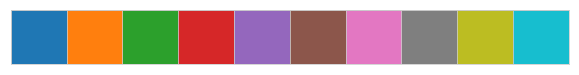

In [2]:
sns.palplot(sns.color_palette())

In [3]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

In [4]:
# import module from scripts folder
import process_data

## Pre processing 

In [5]:
## import dataset from ../data
data_folder = os.path.join('..','Simulations')

simulations = ['PA','PB','CL2','CL4','CLBinomial']

# the same file will be searching
main_file = 'packet_breakdown.txt' 

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(data_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df


In [6]:
df_data.sample(5)

,info_0,info_1,info_2,"Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",Simulation
11,setRateLow,InterfModel=0,node=2,0,0,0.00111,0.94435,0.05454,PA
40,setRateLow,InterfModel=0,node=1,0,0,0.20692,0.70998,0.0831,PB
48,setRateLow,InterfModel=2,node=4,0,0.00056,0.20168,0.68156,0.1162,PB
113,setRateMedium,InterfModel=0,node=4,0,0.00056,0.01781,0.85476,0.12688,CL4
133,setRateLow,InterfModel=0,node=4,0,0,0.02393,0.91708,0.05899,CLBinomial


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
info_0                     150 non-null object
info_1                     150 non-null object
info_2                     150 non-null object
Failed, buffer overflow    150 non-null object
Failed, busy channel       150 non-null object
Failed, no ack             150 non-null object
Success, first try         150 non-null object
Success, not first try     150 non-null object
Simulation                 150 non-null object
dtypes: object(9)
memory usage: 10.6+ KB


### Normalizando os dados

In [8]:
numericColumns = [
    'Failed, buffer overflow',
    'Failed, busy channel' ,
    'Failed, no ack',
    'Success, first try',
    'Success, not first try'
]

df_data[numericColumns] = df_data[numericColumns].astype('float')
df_data[numericColumns] *= 100

In [9]:
nodes_PTbr = {
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'node=0': 'Sink'
    }

nodes_ENG = {
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
        'node=0': 'sink'
    }

def infer_node(value,mapper=nodes_PTbr):
    return mapper.get(value,value)

df_data['info_2'] = df_data['info_2'].apply(infer_node)

In [10]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

In [11]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

### Renomeando colunas

In [12]:
columns_portuguese = {
    'info_0' : 'Taxa dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
    'Failed, buffer overflow': 'Falha, estouro de buffer',
    'Failed, busy channel' : 'Falha, canal ocupado',
    'Failed, no ack': 'Falha, não recebimento ACK', 
    'Success, first try' : 'Sucesso, primeira tentativa',
    'Success, not first try' : 'Sucesso, retransmissão',
    'Simulation' : 'Simulação'
}

columns_english = {
    'info_0' : 'Packet Rate',
    'info_1' : 'Collision Model',
    'info_2' : 'Sensor Node',
}

df_data.rename(mapper=columns_portuguese,axis='columns', inplace=True)

In [13]:
df_data.sample(5)

,Taxa dados,Modelo de colisão,Nó sensor,"Falha, estouro de buffer","Falha, canal ocupado","Falha, não recebimento ACK","Sucesso, primeira tentativa","Sucesso, retransmissão",Simulação
9,alta,com colisão,Peito,19.184,1.076,4.963,62.533,12.243,PA
115,média,com colisão,E-Punho,0.000,0.044,7.206,81.873,10.876,CL4
133,baixa,sem colisão,D-Tornozelo,0.000,0.000,2.393,91.708,5.899,CLBinomial
95,alta,com colisão,E-Punho,0.000,3.225,7.762,68.842,20.171,CL4
87,média,com colisão,E-Tornozelo,0.000,0.022,8.630,81.072,10.276,CL2


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
Taxa dados                     150 non-null object
Modelo de colisão              150 non-null object
Nó sensor                      150 non-null object
Falha, estouro de buffer       150 non-null float64
Falha, canal ocupado           150 non-null float64
Falha, não recebimento ACK     150 non-null float64
Sucesso, primeira tentativa    150 non-null float64
Sucesso, retransmissão         150 non-null float64
Simulação                      150 non-null object
dtypes: float64(5), object(4)
memory usage: 10.6+ KB


In [15]:
df = df_data.describe()
df

,"Falha, estouro de buffer","Falha, canal ocupado","Falha, não recebimento ACK","Sucesso, primeira tentativa","Sucesso, retransmissão"
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.526273,0.730287,7.364680,78.848053,10.530713
std,6.500578,1.169833,8.599462,12.698044,4.478784
min,0.000000,0.000000,0.111000,30.204000,2.936000
25%,0.000000,0.000000,2.498000,69.980250,7.358250
50%,0.000000,0.022000,4.328500,83.166500,10.173500
75%,0.000000,1.180500,7.362000,88.755750,12.619000
max,34.674000,3.825000,37.074000,96.605000,20.407000


In [16]:
value_vars = set(df.columns) - set(['Sucesso, primeira tentativa', 'Sucesso, retransmissão'])
value_vars = list(value_vars)
id_vars = set(df_data.columns) - set(df.columns)
id_vars = list(id_vars)

In [17]:
melted_data = df_data.melt(id_vars=id_vars,
                     value_vars=value_vars,
                     value_name='Valor',
                     var_name='Mac breakdown'
                    )

In [18]:
melted_data.head()

,Nó sensor,Modelo de colisão,Taxa dados,Simulação,Mac breakdown,Valor
0,E-Punho,sem colisão,alta,PA,"Falha, canal ocupado",3.636
1,D-Punho,sem colisão,alta,PA,"Falha, canal ocupado",3.415
2,E-Tornozelo,sem colisão,alta,PA,"Falha, canal ocupado",2.313
3,D-Tornozelo,sem colisão,alta,PA,"Falha, canal ocupado",1.254
4,Peito,sem colisão,alta,PA,"Falha, canal ocupado",1.161


## Visualization

In [19]:
chart_options = dict(data=df_data,
                x='Taxa dados',
                y='Sucesso, primeira tentativa',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                order=['baixa', 'média', 'alta'],
                col='Modelo de colisão',
                row='Nó sensor',
                kind='bar',
                height=3,
                aspect=2,
                sharex=False,
                sharey=False,)

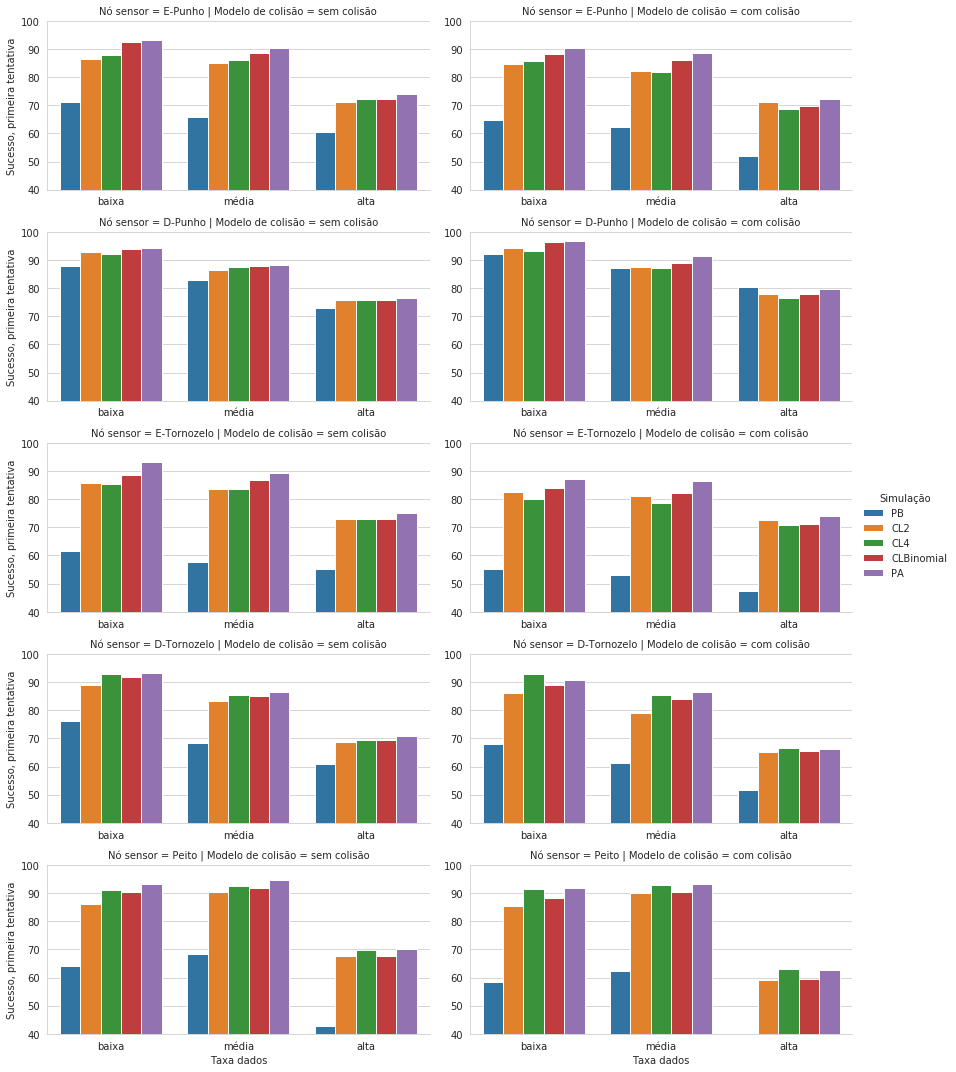

In [20]:
ax = sns.catplot(**chart_options)

ax.set(ylim=(40,100))

In [21]:
chart_options = dict(data=df_data,
                x='Nó sensor',
                y='Sucesso, primeira tentativa',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                row='Modelo de colisão',
                col='Taxa dados',
                col_order=['baixa', 'média', 'alta'],
                kind='bar',
                height=3,
                aspect=3,
                sharex=False,
                sharey=False
                )

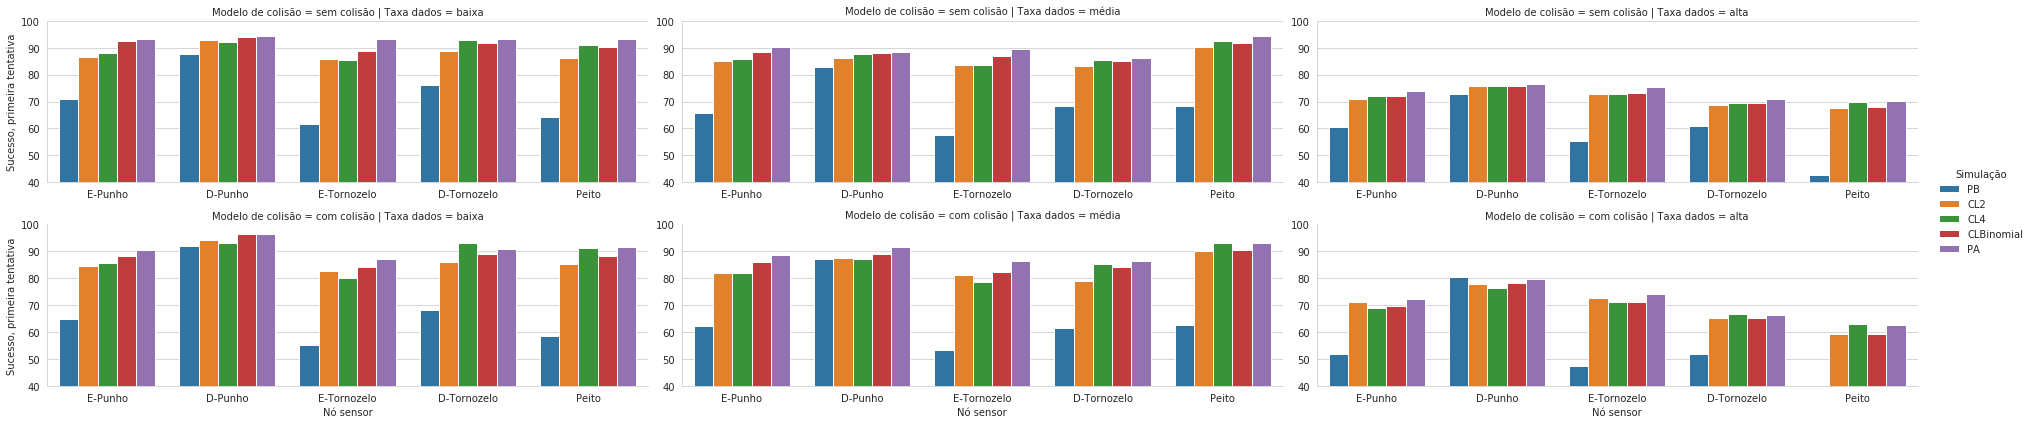

In [22]:
ax = sns.catplot(**chart_options)

ax.set(ylim=(40,100))

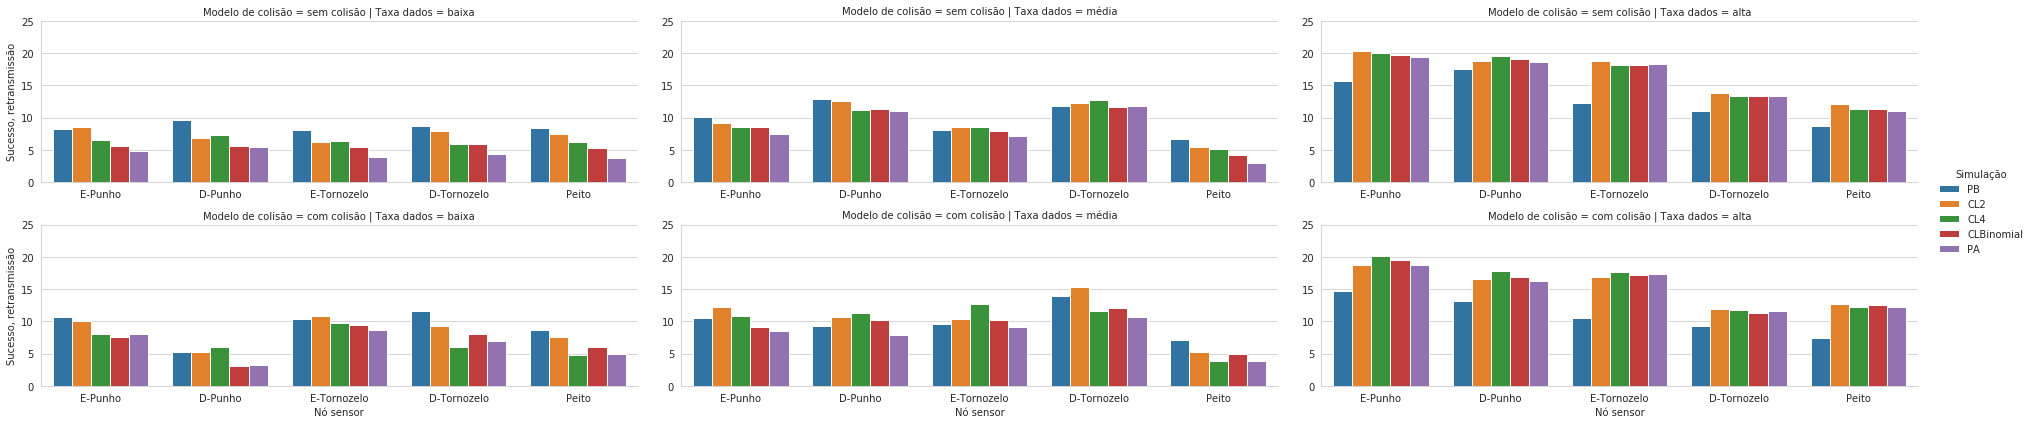

In [23]:
chart_options.update({'y' : 'Sucesso, retransmissão'})

ax = sns.catplot(**chart_options)

ax.set(ylim=(0,25))

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
Taxa dados                     150 non-null object
Modelo de colisão              150 non-null object
Nó sensor                      150 non-null object
Falha, estouro de buffer       150 non-null float64
Falha, canal ocupado           150 non-null float64
Falha, não recebimento ACK     150 non-null float64
Sucesso, primeira tentativa    150 non-null float64
Sucesso, retransmissão         150 non-null float64
Simulação                      150 non-null object
dtypes: float64(5), object(4)
memory usage: 10.6+ KB


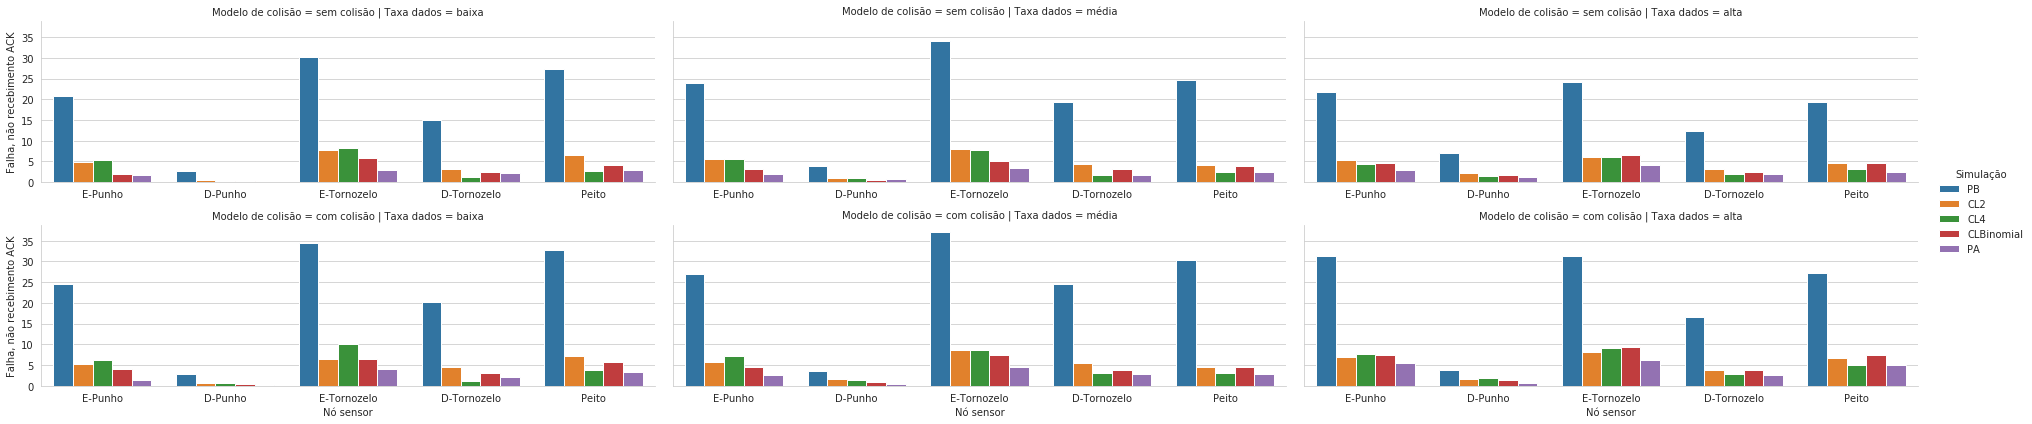

In [25]:
chart_options.update({'y' : 'Falha, não recebimento ACK', 'sharey' : True})

ax = sns.catplot(**chart_options)

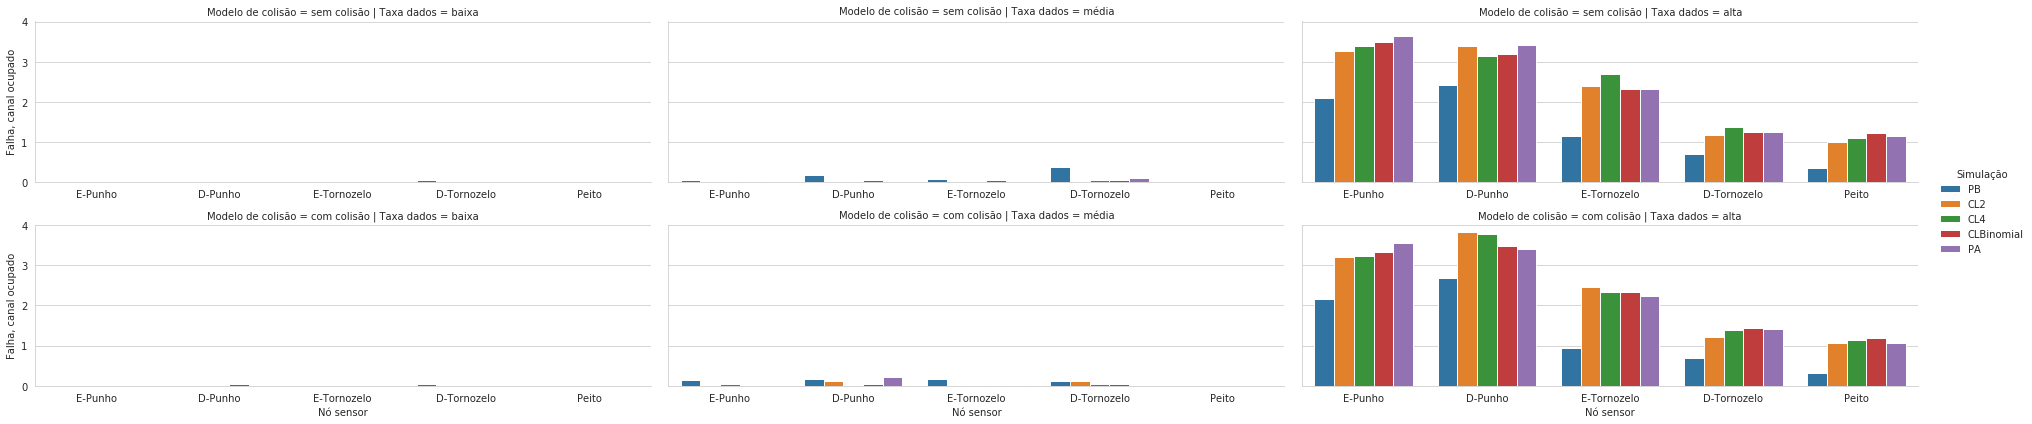

In [26]:
chart_options.update({'y' : 'Falha, canal ocupado', 'sharey' : True})

ax = sns.catplot(**chart_options)

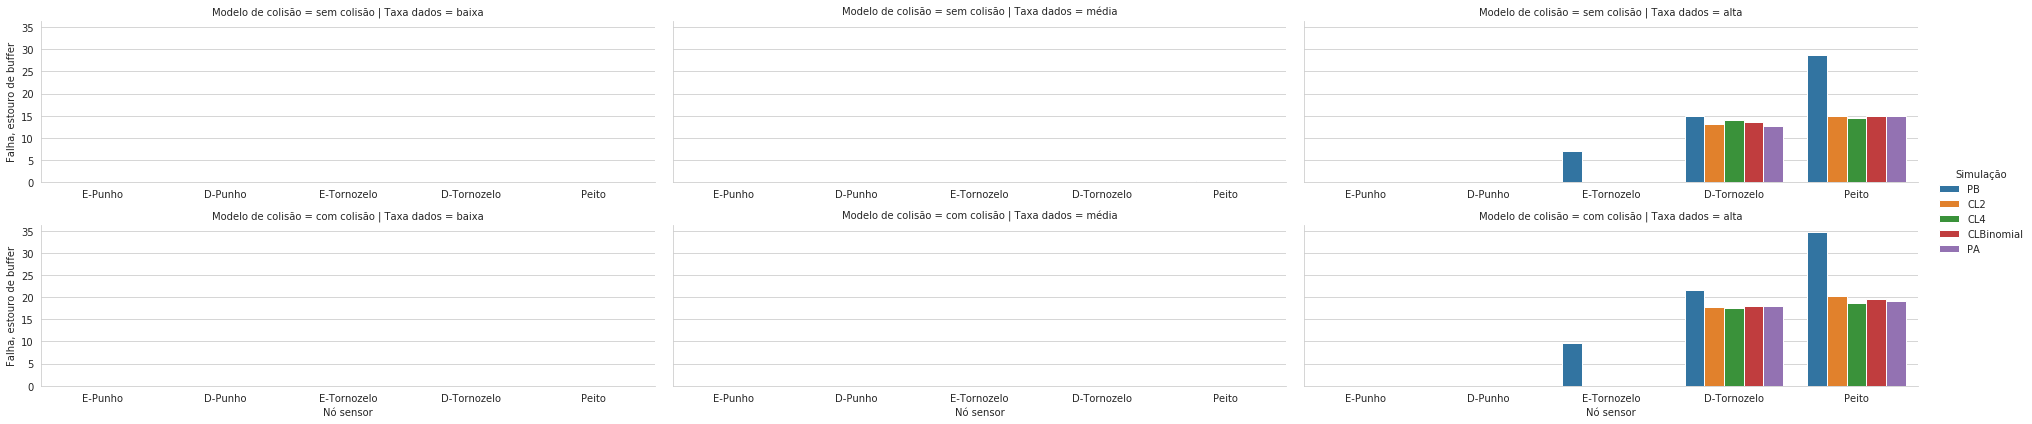

In [27]:
chart_options.update({'y' : 'Falha, estouro de buffer', 'sharey' : True})

ax = sns.catplot(**chart_options)

# ax.set(ylim=(0,25))

In [28]:
melted_data.columns

Index(['Nó sensor', 'Modelo de colisão', 'Taxa dados', 'Simulação',
       'Mac breakdown', 'Valor'],
      dtype='object')

In [29]:
melted_data['Mac breakdown'].unique()

array(['Falha, canal ocupado', 'Falha, estouro de buffer',
       'Falha, não recebimento ACK'], dtype=object)

In [30]:
chart_options = dict(
                x='Nó sensor',
                y='Valor',
                hue='Mac breakdown',
                col='Modelo de colisão',
                row='Simulação',
                col_order=['sem colisão', 'com colisão'],
                kind='bar',
                height=3,
                aspect=2,
                sharex=False,
                sharey=False
                )

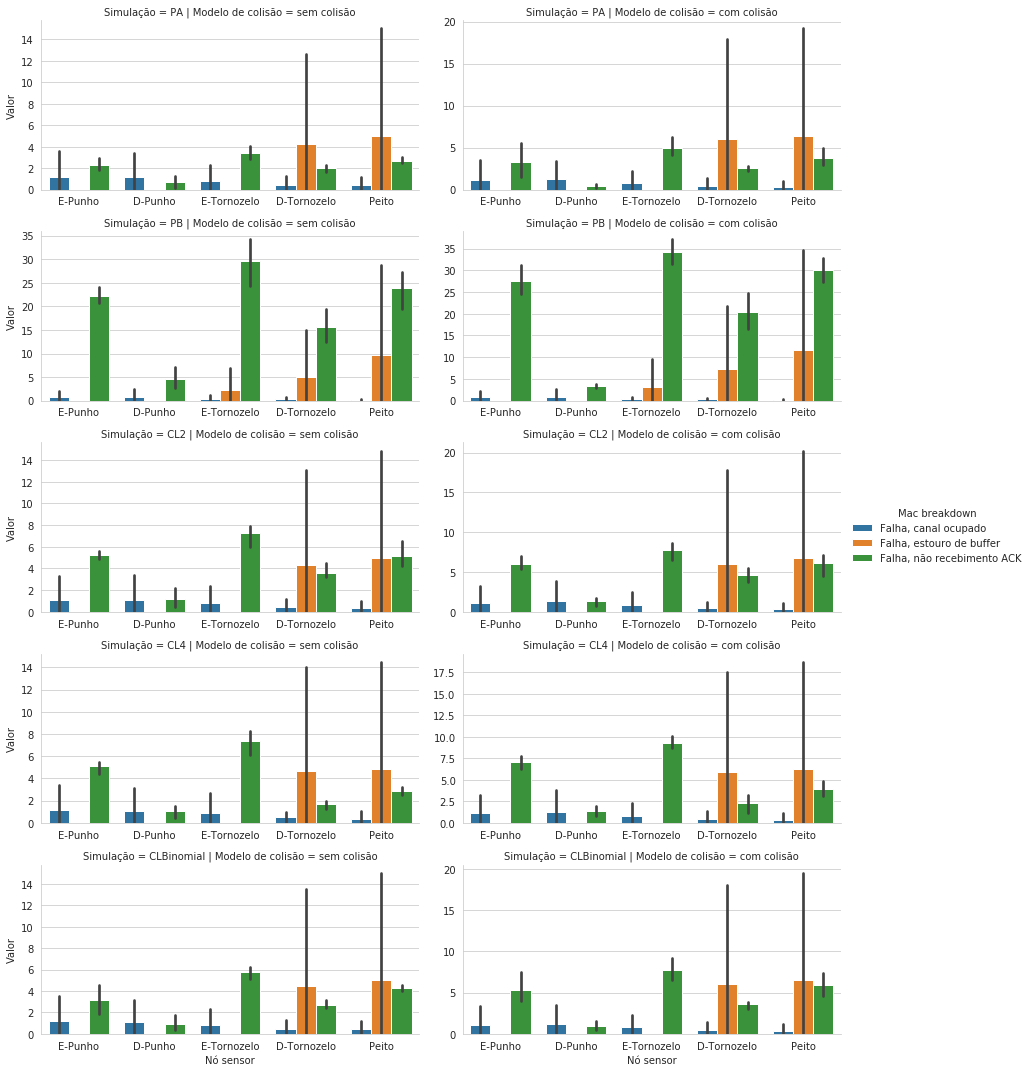

In [31]:
chart_options.update({'data' : melted_data })

sns.catplot(**chart_options)

In [32]:
melted_data['Taxa dados'].unique()

array(['alta', 'baixa', 'média'], dtype=object)

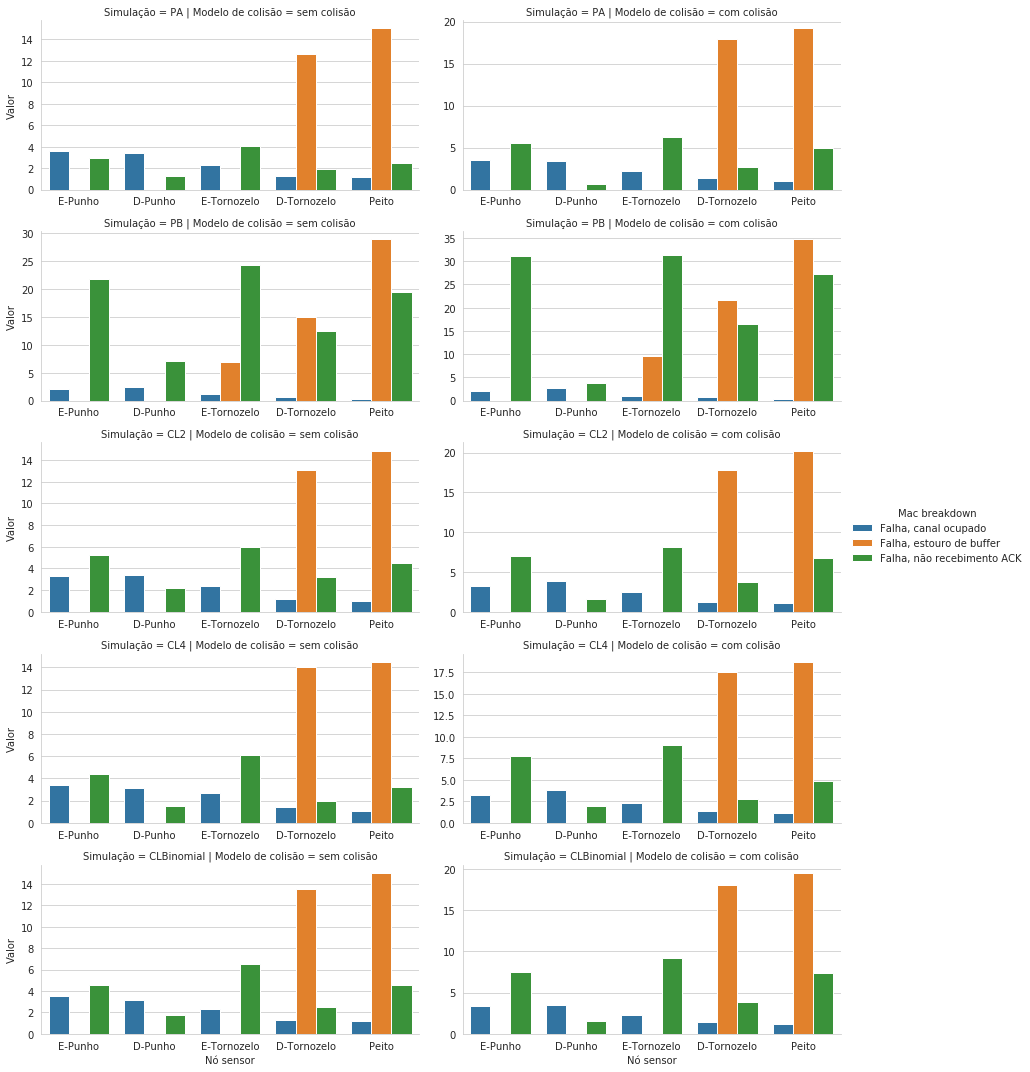

In [33]:
df = melted_data[melted_data['Taxa dados'] == 'alta']

chart_options.update({'data' : df })

sns.catplot(**chart_options)

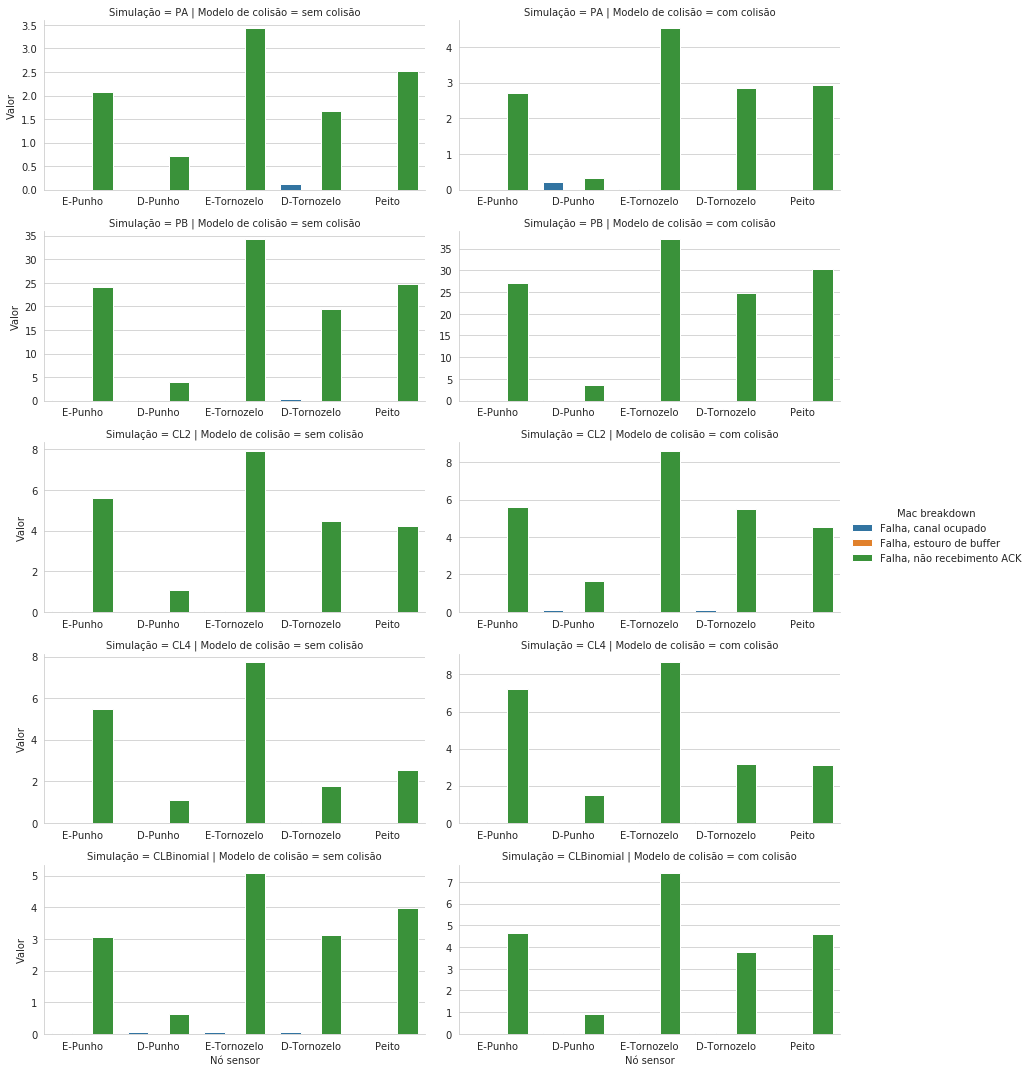

In [34]:
df = melted_data[melted_data['Taxa dados'] == 'média']

chart_options.update({'data' : df })

sns.catplot(**chart_options)

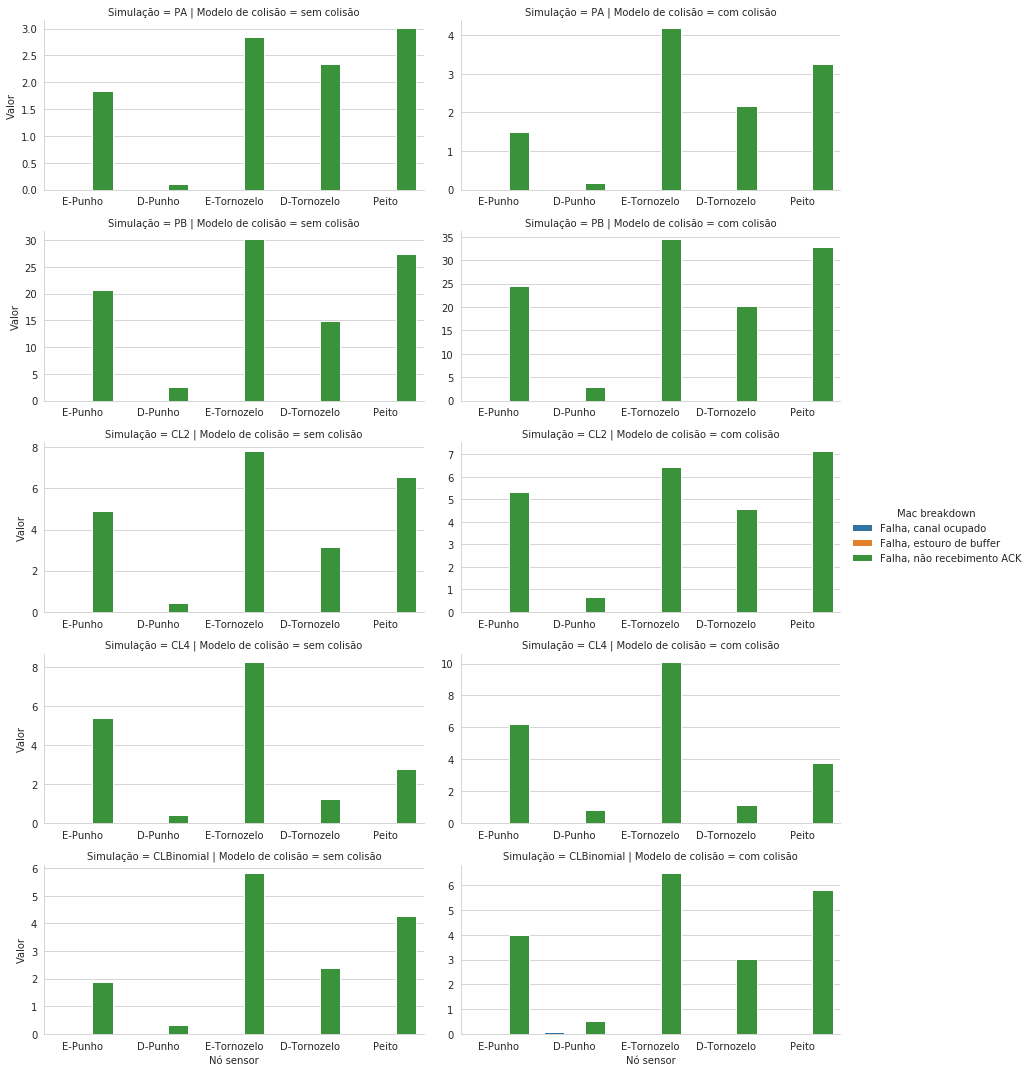

In [35]:
df = melted_data[melted_data['Taxa dados'] == 'baixa']

chart_options.update({'data' : df })

sns.catplot(**chart_options)